# Load datasets (ISOT - FakeNewsChallenge - LIAR - PHEME - FakeNewsNet)

In [ ]:
!pip install transformers
!pip install sentencepiece

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 7.1/7.1 MB 32.3 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 224.5/224.5 kB 24.0 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 7.8/7.8 MB 81.7 MB/s eta 0:00:00
Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 1.3/1.3 MB 19.9 MB/s eta 0:00:00


In [ ]:
from google.colab import drive
import tensorflow as tf
import seaborn as sns
from sklearn.metrics import accuracy_score, recall_score, f1_score
from sklearn.metrics import precision_score
import matplotlib.pyplot as plt
from sklearn.metrics import confusion_matrix
import pandas as pd
import numpy as np
from sklearn.preprocessing import LabelEncoder
import transformers
from transformers import DistilBertTokenizer, TFDistilBertModel, TFDistilBertForSequenceClassification, DistilBertTokenizerFast
from transformers import MobileBertTokenizer, TFMobileBertModel
from transformers import AutoTokenizer, TFAlbertModel
from sklearn.model_selection import train_test_split
from tensorflow.keras.models import Sequential, Model
from tensorflow.keras.layers import Conv1D, Conv2D,MaxPooling1D, MaxPooling2D, Flatten, Dense, Dropout, LSTM, BatchNormalization, Input, Concatenate
import torch
import requests
from tensorflow.keras import activations, optimizers, losses
from tensorflow.keras.callbacks import EarlyStopping

In [ ]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


## **ISOT Title Embeddings - Dataset**

In [ ]:
embeddings_ISOT = np.load('/content/drive/MyDrive/NEWS_DATASET/embeddings_title_distilbert.npy')
labels_ISOT = np.load('/content/drive/MyDrive/NEWS_DATASET/labels_title_distilbert.npy')

In [ ]:
path = '/content/drive/MyDrive/NEWS_DATASET/final.csv'
df_ISOT = pd.read_csv(path,delimiter=',')

In [ ]:
def strip(row):
  return row['text'].strip('"')

df_ISOT['text'] = df_ISOT.apply(strip,axis=1)
df_ISOT.head()

,title,text,label
0,China says Trump plan to move embassy in Israe...,BEIJING (Reuters) - China expressed concern on...,true
1,India says ready for stronger U.S. ties after ...,NEW DELHI (Reuters) - India stood ready to fur...,true
2,A PRESIDENT WHO’S UNSERIOUS AND UNDIGNIFIED…DO...,America deserves so much better and should get...,fake
3,#DNC GIVES ANTI-HILLARY Dems Free Speech Cage ...,"It s just cleaner that way You know, keeping a...",fake
4,Castro meets North Korea minister amid hope Cu...,HAVANA (Reuters) - Cuban President Raul Castro...,true


In [ ]:
label_encoder = LabelEncoder()
label = df_ISOT['label']
labels_encoded = label_encoder.fit_transform(label)
df_ISOT['label'] = labels_encoded
df_ISOT.head()

,title,text,label
0,China says Trump plan to move embassy in Israe...,BEIJING (Reuters) - China expressed concern on...,1
1,India says ready for stronger U.S. ties after ...,NEW DELHI (Reuters) - India stood ready to fur...,1
2,A PRESIDENT WHO’S UNSERIOUS AND UNDIGNIFIED…DO...,America deserves so much better and should get...,0
3,#DNC GIVES ANTI-HILLARY Dems Free Speech Cage ...,"It s just cleaner that way You know, keeping a...",0
4,Castro meets North Korea minister amid hope Cu...,HAVANA (Reuters) - Cuban President Raul Castro...,1


## **PHEME Title Embeddings - Dataset**

In [ ]:
embeddings_PHEME = np.load('/content/drive/MyDrive/PHEME/embeddings_bin.npy')
labels_PHEME = np.load('/content/drive/MyDrive/PHEME/labels_bin.npy')

In [ ]:
path = '/content/drive/MyDrive/PHEME/data.csv'
df_PHEME = pd.read_csv(path,delimiter=',')

In [ ]:
df_PHEME = df_PHEME[df_PHEME['target'] != 'unverified']

In [ ]:
df_PHEME.head()

,text,target
0,What we know so far about the major operation ...,true
3,BREAKING: Police official confirms that 12 hav...,true
4,#BREAKING : Both hostages in #Dammartin and #P...,true
5,Update - French interior ministry says inciden...,false
7,This widely shared cartoon about the #CharlieH...,false


In [ ]:
label_encoder = LabelEncoder()
label = df_PHEME['target']
labels_encoded = label_encoder.fit_transform(label)
df_PHEME['target'] = labels_encoded
df_PHEME.head()

,text,target
0,What we know so far about the major operation ...,1
3,BREAKING: Police official confirms that 12 hav...,1
4,#BREAKING : Both hostages in #Dammartin and #P...,1
5,Update - French interior ministry says inciden...,0
7,This widely shared cartoon about the #CharlieH...,0


## **FakeNewsNet Title Embeddings - Dataset**

In [ ]:
embeddings_FakeNewsNet = np.load('/content/drive/MyDrive/FakeNewsNet/embeddings_title_distilbert.npy')
labels_FakeNewsNet = np.load('/content/drive/MyDrive/FakeNewsNet/labels_title_distilbert.npy')

In [ ]:
path = '/content/drive/MyDrive/FakeNewsNet/final.csv'
df_fakenewsnet = pd.read_csv(path,delimiter=',')

In [ ]:
df_fakenewsnet.head()

,title,label
0,Jax Taylor recalls his 'near-death' experience...,true
1,Bobbi Kristina Brown,true
2,'Shahs of Sunset' Star Mercedes 'MJ' Javid Is ...,true
3,Kourtney Kardashian Needs Scott Disick to Be '...,true
4,Celine Dion Sings Rihanna Song When Asked Abou...,true


In [ ]:
label_encoder = LabelEncoder()
label = df_fakenewsnet['label']
labels_encoded = label_encoder.fit_transform(label)
df_fakenewsnet['label'] = labels_encoded
df_fakenewsnet.head()

,title,label
0,Jax Taylor recalls his 'near-death' experience...,1
1,Bobbi Kristina Brown,1
2,'Shahs of Sunset' Star Mercedes 'MJ' Javid Is ...,1
3,Kourtney Kardashian Needs Scott Disick to Be '...,1
4,Celine Dion Sings Rihanna Song When Asked Abou...,1


## **LIAR Title Embeddings - Dataset**

In [ ]:
def map_label(label):
    if label == 'true':
        return 1
    else:
        return 0

### Train data

In [ ]:
path = '/content/drive/MyDrive/LIAR_DATASET/Train.csv'
df_train_LIAR = pd.read_csv(path,delimiter=',')

In [ ]:
df_train_LIAR.head()

,Label,Statement
0,false,Says the Annies List political group supports ...
1,half-true,When did the decline of coal start? It started...
2,mostly-true,"Hillary Clinton agrees with John McCain ""by vo..."
3,false,Health care reform legislation is likely to ma...
4,half-true,The economic turnaround started at the end of ...


In [ ]:
df_train_LIAR['category'] = df_train_LIAR['Label'].apply(map_label)
df_train_LIAR['category'].unique()

array([0, 1])

In [ ]:
df_train_LIAR.head()

,Label,Statement,category
0,false,Says the Annies List political group supports ...,0
1,half-true,When did the decline of coal start? It started...,0
2,mostly-true,"Hillary Clinton agrees with John McCain ""by vo...",0
3,false,Health care reform legislation is likely to ma...,0
4,half-true,The economic turnaround started at the end of ...,0


In [ ]:
df_train_LIAR.isnull().sum()

Label        0
Statement    0
category     0
dtype: int64

### Test data

In [ ]:
path = '/content/drive/MyDrive/LIAR_DATASET/Test.csv'
df_test_LIAR = pd.read_csv(path,delimiter=',')

In [ ]:
df_test_LIAR.head()

,Label,Statement
0,true,Building a wall on the U.S.-Mexico border will...
1,false,Wisconsin is on pace to double the number of l...
2,false,Says John McCain has done nothing to help the ...
3,half-true,Suzanne Bonamici supports a plan that will cut...
4,pants-fire,When asked by a reporter whether hes at the ce...


In [ ]:
df_test_LIAR['category'] = df_test_LIAR['Label'].apply(map_label)
df_test_LIAR['category'].unique()

array([1, 0])

In [ ]:
df_test_LIAR.isnull().sum()

Label        0
Statement    0
category     0
dtype: int64

### Valid data

In [ ]:
path = '/content/drive/MyDrive/LIAR_DATASET/Valid.csv'
df_valid_LIAR = pd.read_csv(path,delimiter=',')

In [ ]:
df_valid_LIAR.head()

,Label,Statement
0,barely-true,We have less Americans working now than in the...
1,pants-fire,"When Obama was sworn into office, he DID NOT u..."
2,false,Says Having organizations parading as being so...
3,half-true,Says nearly half of Oregons children are poor.
4,half-true,On attacks by Republicans that various program...


In [ ]:
df_valid_LIAR['category'] = df_valid_LIAR['Label'].apply(map_label)
df_valid_LIAR['category'].unique()

array([0, 1])

In [ ]:
df_valid_LIAR.isnull().sum()

Label        0
Statement    0
category     0
dtype: int64

### Embeddings

In [ ]:
#εισάγουμε τα δεδομένα από τ' αποθηκευμένα αρχεία που δημιουργήσαμε νωρίτερα
train_embeddings_LIAR = np.load('/content/drive/MyDrive/LIAR_DATASET/embeddings_train_distilbert_bin.npy')
train_labels_LIAR = np.load('/content/drive/MyDrive/LIAR_DATASET/labels_train_distilbert_bin.npy')

In [ ]:
test_embeddings_LIAR = np.load('/content/drive/MyDrive/LIAR_DATASET/embeddings_test_distilbert_bin.npy')
test_labels_LIAR = np.load('/content/drive/MyDrive/LIAR_DATASET/labels_test_distilbert_bin.npy')

In [ ]:
valid_embeddings_LIAR = np.load('/content/drive/MyDrive/LIAR_DATASET/embeddings_valid_distilbert_bin.npy')
valid_labels_LIAR = np.load('/content/drive/MyDrive/LIAR_DATASET/labels_valid_distilbert_bin.npy')

## **FakeNewsChallenge Title Embeddings - Dataset**

### **train data**

In [ ]:
path = '/content/drive/MyDrive/FakeNewsChallenge/train.csv'
df = pd.read_csv(path,delimiter=',')

In [ ]:
df['Stance'] = df['Stance'].apply(lambda x: 1 if x.lower() in ['agree', 'discuss'] else 0)

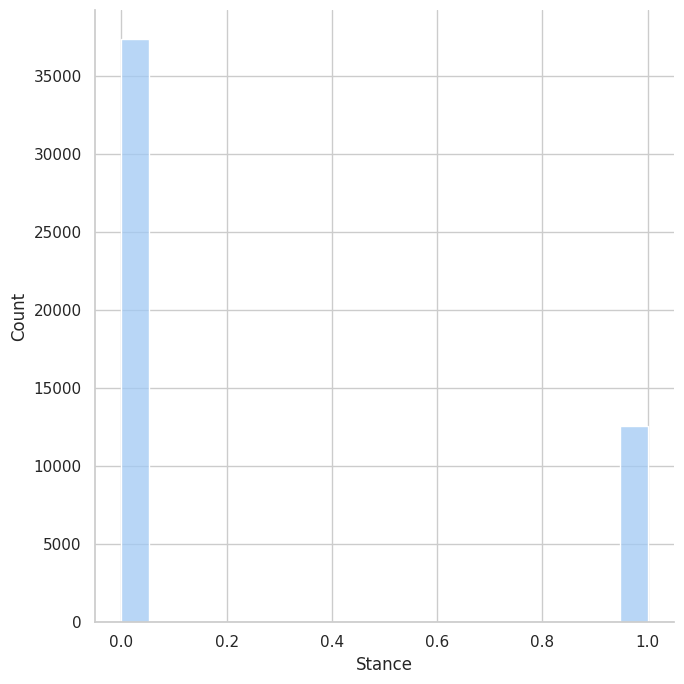

In [ ]:
sns.set_theme(style="whitegrid", palette="pastel")
sns.displot(df, x="Stance",height=7,aspect=1)

### **test data**

In [ ]:
path = '/content/drive/MyDrive/FakeNewsChallenge/test.csv'
df1 = pd.read_csv(path,delimiter=',')

In [ ]:
df1['Stance'] = df1['Stance'].apply(lambda x: 1 if x.lower() in ['agree', 'discuss'] else 0)

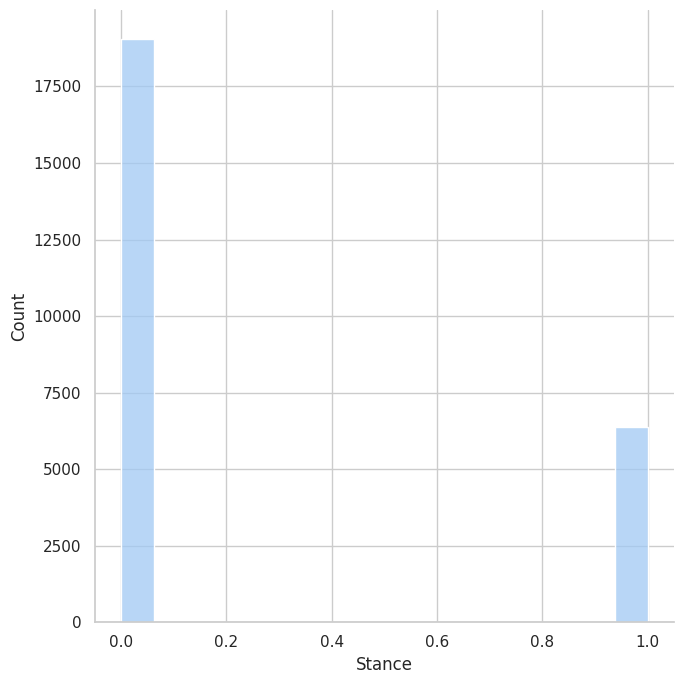

In [ ]:
sns.set_theme(style="whitegrid", palette="pastel")
sns.displot(df1, x="Stance",height=7,aspect=1)

### Embeddings

In [ ]:
train_embeddings_FNC = np.load('/content/drive/MyDrive/FakeNewsChallenge/embeddings_train_title_distilbert_bin.npy')
train_labels_FNC = np.load('/content/drive/MyDrive/FakeNewsChallenge/labels_train_title_distilbert_bin.npy')
test_embeddings_FNC = np.load('/content/drive/MyDrive/FakeNewsChallenge/embeddings_test_title_distilbert_bin.npy')
test_labels_FNC = np.load('/content/drive/MyDrive/FakeNewsChallenge/labels_test_title_distilbert_bin.npy')

# **Concatenate Embeddings**

In [ ]:
train_embeddings_ISOT, test_embeddings_ISOT, train_labels_ISOT, test_labels_ISOT = train_test_split(embeddings_ISOT, labels_ISOT, test_size=0.2, random_state=42, shuffle=True)

In [ ]:
train_embeddings_PHEME, test_embeddings_PHEME, train_labels_PHEME, test_labels_PHEME = train_test_split(embeddings_PHEME, labels_PHEME, test_size=0.2, random_state=42, shuffle=True)

In [ ]:
train_embeddings_FakeNewsNet, test_embeddings_FakeNewsNet, train_labels_FakeNewsNet, test_labels_FakeNewsNet = train_test_split(embeddings_FakeNewsNet, labels_FakeNewsNet, test_size=0.2, random_state=42, shuffle=True)

In [ ]:
train_embeddings = np.concatenate((train_embeddings_ISOT, train_embeddings_PHEME), axis=0)
train_labels = np.concatenate((train_labels_ISOT,train_labels_PHEME),axis=0)
train_embeddings.shape

(37282, 768)

In [ ]:
train_embeddings = np.concatenate((train_embeddings, train_embeddings_FakeNewsNet), axis=0)
train_labels = np.concatenate((train_labels,train_labels_FakeNewsNet),axis=0)
train_embeddings.shape

(55838, 768)

In [ ]:
train_embeddings = np.concatenate((train_embeddings, train_embeddings_LIAR), axis=0)
train_labels = np.concatenate((train_labels,train_labels_LIAR),axis=0)

In [ ]:
test_embeddings = np.concatenate((test_embeddings_ISOT, test_embeddings_PHEME), axis=0)
test_labels = np.concatenate((test_labels_ISOT,test_labels_PHEME),axis=0)

In [ ]:
test_embeddings = np.concatenate((test_embeddings, test_embeddings_FakeNewsNet), axis=0)
test_labels = np.concatenate((test_labels,test_labels_FakeNewsNet),axis=0)

In [ ]:
test_embeddings = np.concatenate((test_embeddings, test_embeddings_LIAR), axis=0)
test_labels = np.concatenate((test_labels,test_labels_LIAR),axis=0)

In [ ]:
train_embeddings = np.concatenate((train_embeddings, test_embeddings_FNC), axis=0)
train_labels = np.concatenate((train_labels,test_labels_FNC),axis=0)
test_embeddings_FNC.shape

(25413, 768)

# CNN

In [ ]:
train_embeddings = tf.expand_dims(train_embeddings, axis=-1)
test_embeddings = tf.expand_dims(test_embeddings, axis=-1)

In [ ]:
train_embeddings.shape

TensorShape([59204, 768, 1])

In [ ]:
# build the model
model = Sequential()
model.add(Conv1D(filters=128, kernel_size=5, activation='relu', input_shape=(768,1)))
model.add(MaxPooling1D(pool_size=5))
model.add(Conv1D(128, 5, activation='relu'))
model.add(MaxPooling1D(pool_size=5))
model.add(Conv1D(128, 5, activation='relu'))
model.add(Flatten())
model.add(Dense(64, activation='relu'))
model.add(Dropout(0.5))
model.add(Dense(1, activation='sigmoid'))

In [ ]:
model.compile(loss='binary_crossentropy', optimizer='adam', metrics=['accuracy'])

In [ ]:
history1 = model.fit(train_embeddings, train_labels, epochs=10, batch_size=16,validation_data=(test_embeddings, test_labels))

Epoch 1/10
3701/3701 [==============================] - 22s 5ms/step - loss: 0.3713 - accuracy: 0.8296 - val_loss: 0.3186 - val_accuracy: 0.8428
Epoch 2/10
3701/3701 [==============================] - 21s 6ms/step - loss: 0.3100 - accuracy: 0.8610 - val_loss: 0.3131 - val_accuracy: 0.8390
Epoch 3/10
3701/3701 [==============================] - 21s 6ms/step - loss: 0.2928 - accuracy: 0.8698 - val_loss: 0.3079 - val_accuracy: 0.8434
Epoch 4/10
3701/3701 [==============================] - 22s 6ms/step - loss: 0.2794 - accuracy: 0.8749 - val_loss: 0.3598 - val_accuracy: 0.8221
Epoch 5/10
3701/3701 [==============================] - 21s 6ms/step - loss: 0.2680 - accuracy: 0.8797 - val_loss: 0.3078 - val_accuracy: 0.8558
Epoch 6/10
3701/3701 [==============================] - 22s 6ms/step - loss: 0.2587 - accuracy: 0.8835 - val_loss: 0.3135 - val_accuracy: 0.8356
Epoch 7/10
3701/3701 [==============================] - 21s 6ms/step - loss: 0.2503 - accuracy: 0.8878 - val_loss: 0.2922 - val_ac

In [ ]:
test_loss, test_acc = model.evaluate(test_embeddings, test_labels)

y_pred = model.predict(test_embeddings)
y_pred = (y_pred > 0.5).astype('int32')

f1 = f1_score(test_labels, y_pred)
recall = recall_score(test_labels, y_pred)
precision = precision_score(test_labels, y_pred)

#accuraccy 
print("Test Accuracy:", test_acc)
#f1-score
print("Test F1 Score:", f1)
#recall
print("Test Recall:", recall)
#precision
print("Precision:", precision)

477/477 [==============================] - 1s 2ms/step
Test Accuracy: 0.8491865396499634
Test F1 Score: 0.8733123932330413
Test Recall: 0.9556198745779064
Precision: 0.8040588533739219


In [ ]:
#λεπτομέρειες για τη δομή του μοντέλου
model.summary()

Model: "sequential_10"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv1d_38 (Conv1D)          (None, 764, 128)          768       
                                                                 
 max_pooling1d_28 (MaxPoolin  (None, 152, 128)         0         
 g1D)                                                            
                                                                 
 conv1d_39 (Conv1D)          (None, 148, 128)          82048     
                                                                 
 max_pooling1d_29 (MaxPoolin  (None, 29, 128)          0         
 g1D)                                                            
                                                                 
 conv1d_40 (Conv1D)          (None, 25, 128)           82048     
                                                                 
 flatten_12 (Flatten)        (None, 3200)            

477/477 [==============================] - 1s 2ms/step
[[5021 1931]
 [ 368 7924]]


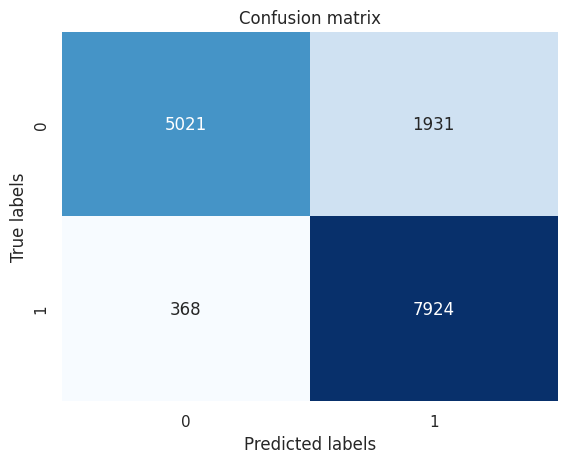

In [ ]:
y_pred = model.predict(test_embeddings)
y_pred = (y_pred > 0.5).astype(int)
cm = confusion_matrix(test_labels, y_pred)
print(cm)
sns.heatmap(cm, annot=True, cmap='Blues', fmt='g', cbar=False)
plt.xlabel('Predicted labels')
plt.ylabel('True labels')
plt.title('Confusion matrix')
plt.show()

In [ ]:
from sklearn.metrics import classification_report, confusion_matrix
def plot_history(history,model):
   # Plot training and validation loss
    sns.lineplot(x=history.epoch, y=history.history['loss'], label='train')
    sns.lineplot(x=history.epoch, y=history.history['val_loss'], label='val')
    plt.title('Model Loss')
    plt.ylabel('Loss')
    plt.xlabel('Epoch')
    plt.legend(loc='upper right')
    plt.show()
    
    # Plot training and validation accuracy
    sns.lineplot(x=history.epoch, y=history.history['accuracy'], label='train')
    sns.lineplot(x=history.epoch, y=history.history['val_accuracy'], label='val')
    plt.title('Model Accuracy')
    plt.ylabel('Accuracy')
    plt.xlabel('Epoch')
    plt.legend(loc='lower right')
    plt.show()

    y_pred = model.predict(test_embeddings)
    y_pred = (y_pred > 0.5).astype(int)
    cm = confusion_matrix(test_labels, y_pred)
    sns.heatmap(cm, annot=True, cmap='Blues', fmt='g', cbar=False)
    plt.xlabel('Predicted labels')
    plt.ylabel('True labels')
    plt.title('Confusion matrix')
    plt.show()
    
    # Print the classification report
    print(classification_report(test_labels, y_pred))

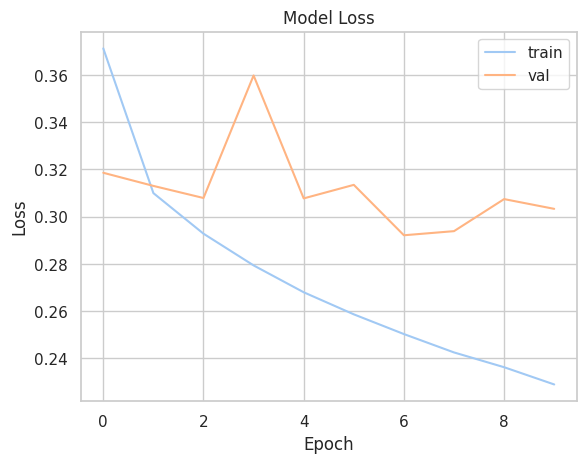

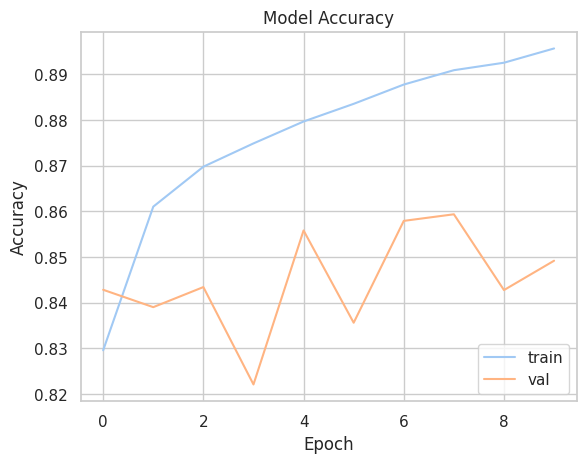

477/477 [==============================] - 1s 2ms/step


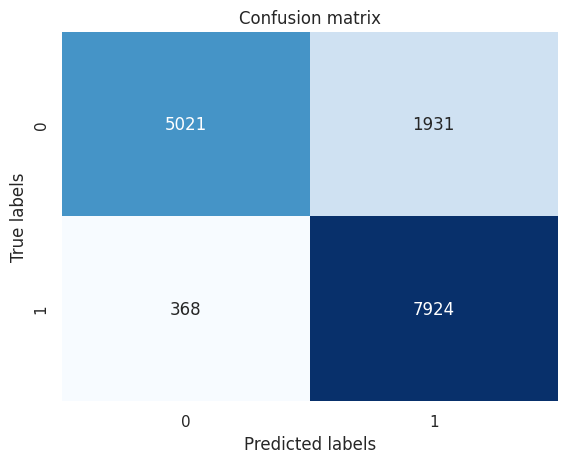

              precision    recall  f1-score   support

           0       0.93      0.72      0.81      6952
           1       0.80      0.96      0.87      8292

    accuracy                           0.85     15244
   macro avg       0.87      0.84      0.84     15244
weighted avg       0.86      0.85      0.85     15244



In [ ]:
plot_history(history1,model)

# LSTM

In [ ]:
model2 = Sequential()
model2.add(Conv1D(64, 5, activation='relu', input_shape=(768, 1)))
model2.add(MaxPooling1D(pool_size=2))
model2.add(Conv1D(64, 5, activation='relu'))
model2.add(MaxPooling1D(pool_size=2))
model2.add(Conv1D(64, 5, activation='relu'))
model2.add(LSTM(64, return_sequences=True))
model2.add(Dropout(0.2))
model2.add(BatchNormalization())
model2.add(Dense(64, activation='relu', kernel_regularizer='l2'))
model2.add(Dropout(0.2))
model2.add(Flatten())
model2.add(Dense(1, activation='sigmoid'))

In [ ]:
model2.compile(loss='binary_crossentropy', optimizer='adam', metrics=['accuracy'])

In [ ]:
history2 = model2.fit(train_embeddings, train_labels, epochs=10, batch_size=16, validation_data=(test_embeddings, test_labels))

Epoch 1/10
3701/3701 [==============================] - 57s 14ms/step - loss: 0.4079 - accuracy: 0.8345 - val_loss: 0.3687 - val_accuracy: 0.8378
Epoch 2/10
3701/3701 [==============================] - 47s 13ms/step - loss: 0.3288 - accuracy: 0.8585 - val_loss: 0.3270 - val_accuracy: 0.8548
Epoch 3/10
3701/3701 [==============================] - 47s 13ms/step - loss: 0.3091 - accuracy: 0.8657 - val_loss: 0.3363 - val_accuracy: 0.8528
Epoch 4/10
3701/3701 [==============================] - 46s 13ms/step - loss: 0.2968 - accuracy: 0.8719 - val_loss: 0.3185 - val_accuracy: 0.8599
Epoch 5/10
3701/3701 [==============================] - 53s 14ms/step - loss: 0.2862 - accuracy: 0.8751 - val_loss: 0.3248 - val_accuracy: 0.8571
Epoch 6/10
3701/3701 [==============================] - 48s 13ms/step - loss: 0.2773 - accuracy: 0.8808 - val_loss: 0.3009 - val_accuracy: 0.8655
Epoch 7/10
3701/3701 [==============================] - 47s 13ms/step - loss: 0.2718 - accuracy: 0.8821 - val_loss: 0.3067 -

In [ ]:
test_loss, test_acc = model2.evaluate(test_embeddings, test_labels, verbose=2)

y_pred = model2.predict(test_embeddings)
y_pred = (y_pred > 0.5).astype('int32')

f1 = f1_score(test_labels, y_pred)
recall = recall_score(test_labels, y_pred)
precision = precision_score(test_labels, y_pred)

print("Test Accuracy:", test_acc)
print("Test F1 Score:", f1)
print("Test Recall:", recall)
print("Precision:", precision)

477/477 - 3s - loss: 0.3057 - accuracy: 0.8600 - 3s/epoch - 5ms/step
477/477 [==============================] - 3s 5ms/step
Test Accuracy: 0.8600105047225952
Test F1 Score: 0.8784599612712154
Test Recall: 0.9300530631934395
Precision: 0.8322900928124326


In [ ]:
model2.summary()

Model: "sequential_8"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv1d_32 (Conv1D)          (None, 764, 64)           384       
                                                                 
 max_pooling1d_24 (MaxPoolin  (None, 382, 64)          0         
 g1D)                                                            
                                                                 
 conv1d_33 (Conv1D)          (None, 378, 64)           20544     
                                                                 
 max_pooling1d_25 (MaxPoolin  (None, 189, 64)          0         
 g1D)                                                            
                                                                 
 conv1d_34 (Conv1D)          (None, 185, 64)           20544     
                                                                 
 lstm_1 (LSTM)               (None, 185, 64)          

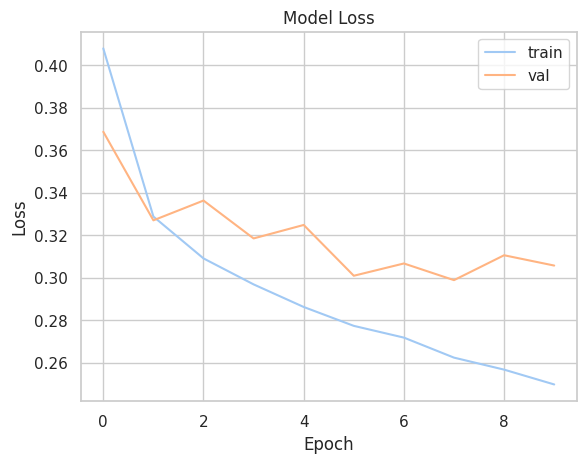

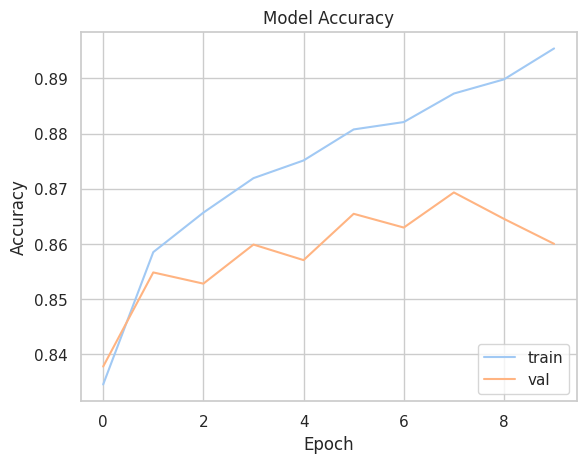

477/477 [==============================] - 2s 5ms/step


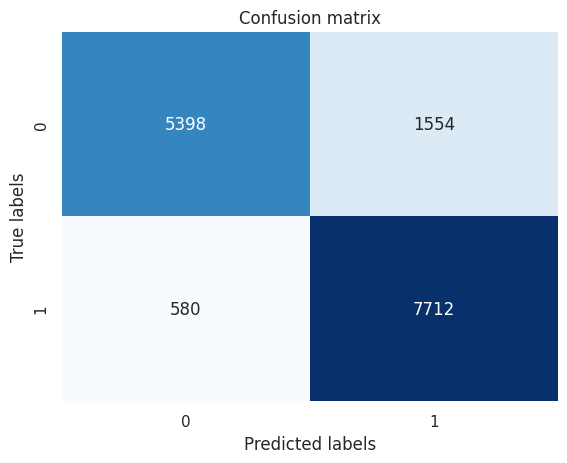

              precision    recall  f1-score   support

           0       0.90      0.78      0.83      6952
           1       0.83      0.93      0.88      8292

    accuracy                           0.86     15244
   macro avg       0.87      0.85      0.86     15244
weighted avg       0.86      0.86      0.86     15244



In [ ]:
plot_history(history2,model2)

# FakeBert

In [ ]:
inputs = Input(shape=(768, 1))
conv1 = Conv1D(128, 3, activation='relu', padding='same')(inputs)
maxpool1 = MaxPooling1D(pool_size=2)(conv1)
conv2 = Conv1D(128, 4, activation='relu', padding='same')(inputs)
maxpool2 = MaxPooling1D(pool_size=2)(conv2)
conv3 = Conv1D(128, 5, activation='relu', padding='same')(inputs)
maxpool3 = MaxPooling1D(pool_size=2)(conv3)
concat = Concatenate()([maxpool1, maxpool2, maxpool3])
conv4 = Conv1D(128, 5, activation='relu', padding='same')(concat)
maxpool4 = MaxPooling1D(pool_size=2)(conv4)
flatten = Flatten()(maxpool4)
dense1 = Dense(384, activation='relu')(flatten)
dropout1 = Dropout(0.5)(dense1)
dense2 = Dense(128, activation='relu')(dropout1)
dropout2 = Dropout(0.5)(dense2)
output = Dense(1, activation='sigmoid')(dropout2)

model3 = Model(inputs=inputs, outputs=output)

In [ ]:
model3.compile(loss='binary_crossentropy', optimizer='adam', metrics=['accuracy'])

In [ ]:
history3 = model3.fit(train_embeddings, train_labels, epochs=10, batch_size=16, validation_data=(test_embeddings, test_labels))

Epoch 1/10
3701/3701 [==============================] - 45s 11ms/step - loss: 0.3519 - accuracy: 0.8385 - val_loss: 0.3315 - val_accuracy: 0.8328
Epoch 2/10
3701/3701 [==============================] - 44s 12ms/step - loss: 0.2985 - accuracy: 0.8677 - val_loss: 0.3112 - val_accuracy: 0.8328
Epoch 3/10
3701/3701 [==============================] - 41s 11ms/step - loss: 0.2805 - accuracy: 0.8760 - val_loss: 0.2848 - val_accuracy: 0.8600
Epoch 4/10
3701/3701 [==============================] - 43s 12ms/step - loss: 0.2674 - accuracy: 0.8818 - val_loss: 0.2763 - val_accuracy: 0.8539
Epoch 5/10
3701/3701 [==============================] - 42s 11ms/step - loss: 0.2592 - accuracy: 0.8848 - val_loss: 0.2786 - val_accuracy: 0.8617
Epoch 6/10
3701/3701 [==============================] - 42s 11ms/step - loss: 0.2497 - accuracy: 0.8911 - val_loss: 0.2751 - val_accuracy: 0.8723
Epoch 7/10
3701/3701 [==============================] - 43s 12ms/step - loss: 0.2417 - accuracy: 0.8942 - val_loss: 0.2768 -

In [ ]:
test_loss, test_acc = model3.evaluate(test_embeddings, test_labels, verbose=2)

y_pred = model3.predict(test_embeddings)
y_pred = (y_pred > 0.5).astype('int32')

f1 = f1_score(test_labels, y_pred)
recall = recall_score(test_labels, y_pred)
precision = precision_score(test_labels, y_pred)

print("Test Accuracy:", test_acc)
print("Test F1 Score:", f1)
print("Test Recall:", recall)
print("Precision:", precision)

477/477 - 3s - loss: 0.2739 - accuracy: 0.8699 - 3s/epoch - 6ms/step
477/477 [==============================] - 2s 5ms/step
Test Accuracy: 0.8699160218238831
Test F1 Score: 0.8873103369892595
Test Recall: 0.9415098890496865
Precision: 0.8390112842557764


In [ ]:
model3.summary()

Model: "model_1"
__________________________________________________________________________________________________
 Layer (type)                   Output Shape         Param #     Connected to                     
 input_2 (InputLayer)           [(None, 768, 1)]     0           []                               
                                                                                                  
 conv1d_28 (Conv1D)             (None, 768, 128)     512         ['input_2[0][0]']                
                                                                                                  
 conv1d_29 (Conv1D)             (None, 768, 128)     640         ['input_2[0][0]']                
                                                                                                  
 conv1d_30 (Conv1D)             (None, 768, 128)     768         ['input_2[0][0]']                
                                                                                            

477/477 [==============================] - 2s 5ms/step
[[5454 1498]
 [ 485 7807]]


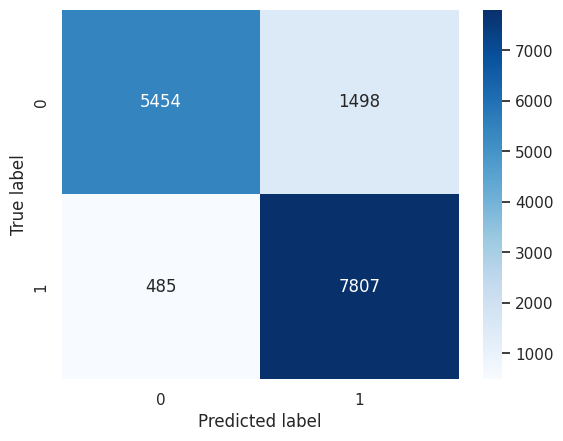

In [ ]:
y_pred = model3.predict(test_embeddings)
y_pred = (y_pred > 0.5).astype(int)
cm = confusion_matrix(test_labels, y_pred)
print(cm)
sns.heatmap(cm, annot=True, cmap='Blues', fmt='g')
plt.xlabel('Predicted label')
plt.ylabel('True label')
plt.show()